In [1]:
import tensorflow as tf

2025-11-09 18:09:43.442106: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
X = tf.constant([[1.0, 2.0], 
                 [3.0, 4.0]])

print(X)
print(X.shape)
print(X.dtype)

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)
(2, 2)
<dtype: 'float32'>


The most important attributes of a tf.Tensor are its shape, and dtype.
- Tensor.shape
- Tensor.dtype

Tensorflow implements standard mathematical operations on tensors, as well as operations specified for machine learning.

In [4]:
X + X

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 4.],
       [6., 8.]], dtype=float32)>

##   TensorFlow 中 tensor 的转置（tf.transpose）逻辑说明：


### TensorFlow 中 tensor 的转置（tf.transpose）逻辑说明：

1. perm 的含义：perm 是一个长度为 n 的整数列表，表示输出的第 k 个维度来自输入的第 perm[k] 个维度。
   - 因此输出张量 y 的形状满足：y.shape[k] = x.shape[perm[k]]。
   - 默认情况下，perm 会被设置为 [n-1, n-2, ..., 0]，也就是将维度反转（对 2D 就是常规矩阵转置）。

2. 索引映射（更直观）：
   - 如果 y = tf.transpose(x, perm)，则
     y[i0, i1, ..., i{n-1}] = x[i_{perm[0]}, i_{perm[1]}, ..., i_{perm[n-1]}]。
   - 例如：对于 2D（矩阵），perm=[1,0]，有 y[i,j] = x[j,i]；
     对于 3D，perm=[1,0,2]，有 y[a,b,c] = x[b,a,c]（即交换第 0、1 两个维度）。

3. conjugate 参数（仅对复数类型有效）：
   - 如果 x.dtype 是 complex64 或 complex128，且调用 tf.transpose(x, conjugate=True)，
     那么在转置的同时还会对数值做共轭（相当于复共轭转置）。

4. 使用建议与注意事项：
   - 对于高维张量，明确写出 perm 更易读也更可控；
   - 如果只想交换两个维度，可用 perm 指定对应位置交换；
   - 转置通常不改变内存占用，但可能改变内存布局，影响后续操作性能。

## 详细演示 tf.transpose 元素转换过程

### 核心原理：索引映射规则
如果 `y = tf.transpose(x, perm)`，那么：
**`y[i0, i1, ..., i_{n-1}] = x[i_{perm[0]}, i_{perm[1]}, ..., i_{perm[n-1]}]`**

这意味着：
- 输出张量 y 在位置 `[i0, i1, ..., i_{n-1}]` 的元素
- 来自输入张量 x 在位置 `[i_{perm[0]}, i_{perm[1]}, ..., i_{perm[n-1]}]` 的元素

下面我们用具体例子来演示这个转换过程：

In [30]:
# 示例1：2D矩阵转置 - 逐步演示元素转换
import tensorflow as tf
import numpy as np

print("=" * 60)
print("示例1：2D矩阵转置 perm=[1,0]")
print("=" * 60)

# 创建一个2x3的矩阵
A = tf.constant([[10, 20, 30], 
                 [40, 50, 60]])
print("原始矩阵 A (shape: 2x3):")
print(A.numpy())

# 转置：perm=[1,0] 意味着新矩阵的维度0来自原矩阵的维度1，维度1来自原矩阵的维度0
A_t = tf.transpose(A, perm=[1, 0])
print(f"\n转置后 A_t (shape: 3x2):")
print(A_t.numpy())

print("\n元素转换过程详解:")
print("根据规则：A_t[i,j] = A[j,i] (因为perm=[1,0])")
print()

# 逐个验证每个元素的转换
for i in range(3):  # A_t的行
    for j in range(2):  # A_t的列
        print(f"A_t[{i},{j}] = A[{j},{i}] = {A_t[i,j].numpy()} (来自 A[{j},{i}] = {A[j,i].numpy()})")

print("\n可视化转换过程:")
print("A[0,0]=10 → A_t[0,0]=10")
print("A[0,1]=20 → A_t[1,0]=20") 
print("A[0,2]=30 → A_t[2,0]=30")
print("A[1,0]=40 → A_t[0,1]=40")
print("A[1,1]=50 → A_t[1,1]=50")
print("A[1,2]=60 → A_t[2,1]=60")

示例1：2D矩阵转置 perm=[1,0]
原始矩阵 A (shape: 2x3):
[[10 20 30]
 [40 50 60]]

转置后 A_t (shape: 3x2):
[[10 40]
 [20 50]
 [30 60]]

元素转换过程详解:
根据规则：A_t[i,j] = A[j,i] (因为perm=[1,0])

A_t[0,0] = A[0,0] = 10 (来自 A[0,0] = 10)
A_t[0,1] = A[1,0] = 40 (来自 A[1,0] = 40)
A_t[1,0] = A[0,1] = 20 (来自 A[0,1] = 20)
A_t[1,1] = A[1,1] = 50 (来自 A[1,1] = 50)
A_t[2,0] = A[0,2] = 30 (来自 A[0,2] = 30)
A_t[2,1] = A[1,2] = 60 (来自 A[1,2] = 60)

可视化转换过程:
A[0,0]=10 → A_t[0,0]=10
A[0,1]=20 → A_t[1,0]=20
A[0,2]=30 → A_t[2,0]=30
A[1,0]=40 → A_t[0,1]=40
A[1,1]=50 → A_t[1,1]=50
A[1,2]=60 → A_t[2,1]=60


In [31]:
print("\n" + "=" * 60)
print("示例2：3D张量转置 perm=[2,1,0] - 完全反转维度")
print("=" * 60)

# 创建一个2x2x3的3D张量
B = tf.constant([[[100, 101, 102], 
                  [110, 111, 112]], 
                 [[200, 201, 202], 
                  [210, 211, 212]]])

print("原始3D张量 B (shape: 2x2x3):")
print("B[0,:,:] =")
print(B[0,:,:].numpy())
print("B[1,:,:] =") 
print(B[1,:,:].numpy())

# 转置：perm=[2,1,0] 意味着：
# - 新张量的维度0来自原张量的维度2
# - 新张量的维度1来自原张量的维度1  
# - 新张量的维度2来自原张量的维度0
B_t = tf.transpose(B, perm=[2, 1, 0])
print(f"\n转置后 B_t (shape: 3x2x2):")
print("B_t[0,:,:] =")
print(B_t[0,:,:].numpy())
print("B_t[1,:,:] =")
print(B_t[1,:,:].numpy()) 
print("B_t[2,:,:] =")
print(B_t[2,:,:].numpy())

print("\n元素转换规则：B_t[i,j,k] = B[k,j,i] (因为perm=[2,1,0])")
print("\n验证几个关键元素的转换:")

# 选择几个具体位置验证
test_positions = [(0,0,0), (0,1,1), (1,0,1), (2,1,0)]

for i, j, k in test_positions:
    original_val = B[k, j, i].numpy()  # 根据perm=[2,1,0]，B_t[i,j,k] = B[k,j,i]
    transposed_val = B_t[i, j, k].numpy()
    print(f"B_t[{i},{j},{k}] = {transposed_val} ← B[{k},{j},{i}] = {original_val}")
    assert transposed_val == original_val, "转换验证失败！"


示例2：3D张量转置 perm=[2,1,0] - 完全反转维度
原始3D张量 B (shape: 2x2x3):
B[0,:,:] =
[[100 101 102]
 [110 111 112]]
B[1,:,:] =
[[200 201 202]
 [210 211 212]]

转置后 B_t (shape: 3x2x2):
B_t[0,:,:] =
[[100 200]
 [110 210]]
B_t[1,:,:] =
[[101 201]
 [111 211]]
B_t[2,:,:] =
[[102 202]
 [112 212]]

元素转换规则：B_t[i,j,k] = B[k,j,i] (因为perm=[2,1,0])

验证几个关键元素的转换:
B_t[0,0,0] = 100 ← B[0,0,0] = 100
B_t[0,1,1] = 210 ← B[1,1,0] = 210
B_t[1,0,1] = 201 ← B[1,0,1] = 201
B_t[2,1,0] = 112 ← B[0,1,2] = 112


In [32]:
print("\n" + "=" * 60)
print("示例3：3D张量部分维度交换 perm=[1,0,2]")
print("=" * 60)

# 创建一个更直观的3D张量，每个元素包含其坐标信息
C = tf.constant([[[100, 101], [110, 111], [120, 121]], 
                 [[200, 201], [210, 211], [220, 221]]])

print("原始3D张量 C (shape: 2x3x2):")
print("可以理解为2个3x2的矩阵:")
for i in range(2):
    print(f"C[{i},:,:] =")
    print(C[i,:,:].numpy())

# perm=[1,0,2] 意味着只交换第0和第1维，第2维保持不变
C_t = tf.transpose(C, perm=[1, 0, 2])
print(f"\n转置后 C_t (shape: 3x2x2):")
print("现在变成3个2x2的矩阵:")
for i in range(3):
    print(f"C_t[{i},:,:] =")
    print(C_t[i,:,:].numpy())

print("\n元素转换规则：C_t[i,j,k] = C[j,i,k] (因为perm=[1,0,2])")
print("详细转换过程:")

# 展示所有元素的转换
for i in range(3):  # 新张量的第0维
    for j in range(2):  # 新张量的第1维  
        for k in range(2):  # 新张量的第2维
            original_val = C[j, i, k].numpy()  # C_t[i,j,k] = C[j,i,k]
            transposed_val = C_t[i, j, k].numpy()
            print(f"C_t[{i},{j},{k}] = {transposed_val:3d} ← C[{j},{i},{k}] = {original_val:3d}")

print("\n观察：第2维（最后一维）的元素保持在相同位置，只有前两维进行了交换")


示例3：3D张量部分维度交换 perm=[1,0,2]
原始3D张量 C (shape: 2x3x2):
可以理解为2个3x2的矩阵:
C[0,:,:] =
[[100 101]
 [110 111]
 [120 121]]
C[1,:,:] =
[[200 201]
 [210 211]
 [220 221]]

转置后 C_t (shape: 3x2x2):
现在变成3个2x2的矩阵:
C_t[0,:,:] =
[[100 101]
 [200 201]]
C_t[1,:,:] =
[[110 111]
 [210 211]]
C_t[2,:,:] =
[[120 121]
 [220 221]]

元素转换规则：C_t[i,j,k] = C[j,i,k] (因为perm=[1,0,2])
详细转换过程:
C_t[0,0,0] = 100 ← C[0,0,0] = 100
C_t[0,0,1] = 101 ← C[0,0,1] = 101
C_t[0,1,0] = 200 ← C[1,0,0] = 200
C_t[0,1,1] = 201 ← C[1,0,1] = 201
C_t[1,0,0] = 110 ← C[0,1,0] = 110
C_t[1,0,1] = 111 ← C[0,1,1] = 111
C_t[1,1,0] = 210 ← C[1,1,0] = 210
C_t[1,1,1] = 211 ← C[1,1,1] = 211
C_t[2,0,0] = 120 ← C[0,2,0] = 120
C_t[2,0,1] = 121 ← C[0,2,1] = 121
C_t[2,1,0] = 220 ← C[1,2,0] = 220
C_t[2,1,1] = 221 ← C[1,2,1] = 221

观察：第2维（最后一维）的元素保持在相同位置，只有前两维进行了交换


### 总结：tf.transpose 元素转换的核心规律

1. **索引映射公式**：`y[i0, i1, ..., i_{n-1}] = x[i_{perm[0]}, i_{perm[1]}, ..., i_{perm[n-1]}]`

2. **维度变换**：`y.shape[k] = x.shape[perm[k]]`

3. **直观理解**：
   - `perm[k]` 告诉我们新张量的第k维来自原张量的第`perm[k]`维
   - 每个元素都会根据这个映射规则"搬家"到新位置

4. **常见用法**：
   - `perm=[1,0]`：2D矩阵的标准转置
   - `perm=[2,1,0]`：完全反转所有维度
   - `perm=[1,0,2]`：只交换前两维，保持其他维度不变

下面运行一个交互式的验证工具：

##  Tenforflow concat 

Concatenates tensors along one dimension.  Concatenates the list of tensors values along dimension axis. if value[i].shape = [D0,D1,...,Daxis,...,Dn], the concatenated result has shape [D0,D1,...,Raxis,...,Dn], where Raxis = sum of Daxis over all tensors.

This is, the data from the input tensors is joined along the axis dimension.
the number of dimensions of the input tensors must match, and all dimensions except axis must be the same size.


In [ ]:
t1 = tf.constant([[1, 2, 3], [4, 5, 6]])
print(t1.shape)

t2 = tf.constant([[7, 8], [10, 11]])
print(t2.shape)

result = tf.concat([t1, t2], axis=1)
print(result)


(2, 3)
(2, 2)
tf.Tensor(
[[ 1  2  3  7  8]
 [ 4  5  6 10 11]], shape=(2, 5), dtype=int32)


## TensorFlow 中 tensor softmax(x, axis=-1)

Used for multi-class prediction. The sum of all outputs generated by softmax is 1.

This function performs the equivalent of the following 

$$softmax = tf.exp(x) / tf.reduce\_sum(tf.exp(x), axis=axis, keepdims=True)$$

In [66]:
softmax = tf.nn.softmax([-1, 0., 1.])
print(softmax)

sum(softmax)

tf.Tensor([0.09003057 0.24472848 0.66524094], shape=(3,), dtype=float32)


<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

####  TensorFlow 中 exponentation 函数 tf.exp(x)

Computes the exponential of x element-wise. y = e^x

This function computes the exponential of each element in the input tensor x. i.e. math.exp(x) or e^x. where x is the input tensor. 
e denotes Euler's number and is approximately equal to 2.718281828459045. Output is positive for any real input.  


For complex(复数) numbers, the exponential function value is calculated as follows:
$$ e^(a+bi) = e^a * (cos(b) + i*sin(b)) $$


In [49]:
x = tf.constant(2.0)
print(tf.exp(x))

x = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
print(tf.exp(x))


tf.Tensor(7.389056, shape=(), dtype=float32)
tf.Tensor(
[[  2.7182817   7.389056   20.085537 ]
 [ 54.59815   148.41316   403.4288   ]], shape=(2, 3), dtype=float32)


####   TensorFlow math reduce_sum(input_tensor, axis=None, keepdims=False)

Computes the sum of elements across dimensions of a tensor.

This is the reduction operation for the elementwise tf.math.add op.

reduces input_tensor along the dimensions given in axis. unless keepdims is true, the rank of the tensor is reduced by 1 for each entry in axis, which must be unique. if keepdims is true, the reduced dimensions are retained with length 1. For purpose of consistency of output shape, prefer to keepdims=True.

if axis is None, all dimensions are reduced, and a tensor with a single element is returned.

In [61]:
# x has a shape of (2, 3) (two rows and three columns):
x = tf.constant([[1, 1, 1], [1, 1, 1]])
print(x)
## sum all the elements 
print(tf.reduce_sum(x))

## Reduce along the first dimension
print(tf.reduce_sum(x, axis=0))  # shape (3,)

## Reduce along the second dimension
## keepdims = True 保持降维后的维度信息
print(tf.reduce_sum(x, axis=1))  # shape (2,)

## Reduce along the second dimension and keepdims=True
print(tf.reduce_sum(x, axis=1, keepdims=True))  # shape (2,)

tf.Tensor(
[[1 1 1]
 [1 1 1]], shape=(2, 3), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor([2 2 2], shape=(3,), dtype=int32)
tf.Tensor([3 3], shape=(2,), dtype=int32)
tf.Tensor(
[[3]
 [3]], shape=(2, 1), dtype=int32)


## TensorFlow中convert_to_tensor

Converts the given value to a Tensor.

This function converts python objects of various types to tensor objects. It accepts Tensor objects, numpy arrarys, python lists, python scalars and more.

this function can be useful to when composing a new operation in python. All standard Python op constructors apply this function to each of their Tensor-valued inputs, which allows those ops to accept numpy arrarys, python lists, and scalars as inputs in addition to Tensor objects.


In [ ]:
import numpy as np
def my_func(arg):
    arg = tf.convert_to_tensor(arg, dtype=tf.float32)
    return arg

In [75]:
x = np.array([[1, 2, 3],[4, 5, 6]], dtype=np.float32)
print(x)

value_1 = my_func(x)
print(value_1)

[[1. 2. 3.]
 [4. 5. 6.]]
tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)


In [76]:
if tf.config.list_physical_devices('GPU'):
  print("TensorFlow **IS** using the GPU")
else:
  print("TensorFlow **IS NOT** using the GPU")


TensorFlow **IS NOT** using the GPU


In [78]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

## TensorFlow Variables

Normal tf.Tensor objects are immutable. To store model weights or other mutable state in TensorFlow use a  tf.Variable.

In [83]:
var = tf.Variable([[1.0, 2.0], [3.0, 4.0]])
print(var)

var.assign([[5.0, 6.0], [7.0, 8.0]])
print(var)

var.assign_add([[1.0, 1.0], [1.0, 1.0]])
print(var)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[5., 6.],
       [7., 8.]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[6., 7.],
       [8., 9.]], dtype=float32)>


## Automatic differentiation（微分， 求导的过程，这个过程用于确定函数在某个点上瞬时的变换率或斜率）
Gradient descent and related algorithms are a cornerstore (指的是建筑物底部或地基中放置的第一块石头， 通常有象征意义用来说明事物基础或者核心的部分) of modern machine learning . 

To enable this, Tenforflow implements automatic differentiation(autodiff), which uses calculus to compute gradients.  Typically, you'll use this to caluculate the gradient of a model's error or loss with respect to its weights. 

The simplified example only takes the derivative with respect to a single scalar variable x, but Tensorflow can compute the gradient with respect to any number of non-scalar tensors simultaneously.


In [88]:
x = tf.Variable(1.0)
def f(x):
    y = x**2 + 2*x - 5
    return y

f(x)
with tf.GradientTape() as tape:
    y = f(x)

g_x = tape.gradient(y, x) ## 

### Introduction to gradients and automatic differentiation

Automatic Differentiation is useful for implementing machine learning algorithms such as bacpropagation for training neural networks. 

In this guide, you will explore ways to compute gradients with Tensorflow, expecially in eager execution. 

In [30]:
import numpy as np
import matplotlib.pyplot as plt


#### Computing gradients

To differentiate automatically, Tensorflow needs to remember what operations happen in what order during the forward pass. Then, during the backward pass, Tensorflow traverses this list of operations in reverse order to compute the gradients.  

### Gradient Tapes
Tensorflow provides the tf.GradientTape API for automatic differentiation; that is, computing the gradient of a computation with respect to some inputs, ususally tf.Variables. Tensorflow "records" relevant operations executed inside the context of a tf.GradientTape onto a "tape". Tensorflow then uses that tape to compute the gradients of a "recorded" computation using reverse mode differentiation.

**翻译为中文：**
TensorFlow 提供了 tf.GradientTape API 用于自动微分；也就是计算某个计算相对于一些输入（通常是 tf.Variables）的梯度。TensorFlow 会在 tf.GradientTape 的上下文中“记录”执行的相关操作到一个“磁带”上。然后，TensorFlow 使用该磁带通过反向模式微分来计算“记录”的计算的梯度。




In [3]:
x = tf.Variable(3.0)
with tf.GradientTape() as tape:
    y = x**2 + 2*x - 5

### Once you've recorded some operations, use GrandientTape.gradient() to calculate the gradient of some target (often a loss) relative to some source (often model's variables)

dy_dx = tape.gradient(y, x)
dy_dx.numpy()
print(dy_dx.numpy())


8.0


In [21]:
### the above example uses scalars, but tf.GradientTape works as easily on any tensors. 
# 标准神经网络表示法：w(n_l, n_l-1), b(n_l)
# n_l-1 = 3 (前一层/输入层神经元数)
# n_l = 2 (当前层神经元数)
w = tf.Variable(tf.random.normal((2, 3)), name='w')  # (n_l, n_l-1) = (2, 3)
b = tf.Variable(tf.zeros((2,)), name='b')           # (n_l,) = (2,)
x = [[1.0, 2.0, 3.0],
     [4.0, 5.0, 6.0]]
with tf.GradientTape() as tape:
    y = w @ tf.transpose(x) + tf.expand_dims(b, axis=1)  # 标准神经网络前向传播
    loss = tf.reduce_mean(y**2)  # Mean squared error loss
    
    
## to get the gradients of loss with respect to both variables w and b, you can pass both as sources to the gradient method. the tape is flexible about how sources are passed and will accept any nested combination of lists or dictionaries and return the gradients structured the same way.  
[dl_dw, dl_db] = tape.gradient(loss, [w, b])
print("Gradient wrt w:")
print(dl_dw.numpy())
print("Gradient wrt b:")
print(dl_db.numpy())



In [ ]:
## Here is the gradient calculation again, this time passing a dictionary of variables as sources.
with tf.GradientTape() as tape:
    y = w @ tf.transpose(x) + tf.expand_dims(b, axis=1)  # 标准神经网络前向传播
    loss = tf.reduce_mean(y**2)  # Mean squared error loss
    
my_vars = {'weight': w, 'bias': b}
grads = tape.gradient(loss, my_vars)
print("Gradient wrt weight:")
print(grads['weight'].numpy())
print("Gradient wrt bias:")
print(grads['bias'].numpy())    

#### Gradients with respect to a model
It's common to collect tf.Variables into a tf.Module or one of its subclasses (layers.Layer, keras.Model) for checkpointing and exporting. 

In most cases, you will want to calculate gradients with respect to a model's trainable variables. Since all subclasses of tf.Module aggregate their variables in the Module.trainable_variables property, you can calculate these gradients in a few lines of code:


In [3]:
layer = tf.keras.layers.Dense(units=2, activation='relu')  # 输入大小3，输出大小2
x = tf.constant([[1.0, 2.0, 3.0]])

print(layer.trainable_variables)
with tf.GradientTape() as tape:
    y = layer(x)
    loss = tf.reduce_mean(y**2)
    
## calculate gradients with respect to the layer's trainable variables
grads = tape.gradient(loss, layer.trainable_variables)
for var, grad in zip(layer.trainable_variables, grads):
    print(f"Variable: {var.name}, Gradient: {grad.numpy()}")

[]
Variable: kernel, Gradient: [[3.1209607 0.5997902]
 [6.2419214 1.1995804]
 [9.362883  1.7993706]]
Variable: bias, Gradient: [3.1209607 0.5997902]


### Controlling what the tape watches
The default behavior is to record all operations after accessing a trainable tf.Variable. The reasons for this are:
- The tape needs to know which operations to record in the forward pass to calculate the gradients in the backward pass.
- The tape holds references to intermediate outputs, so you don't want to record unnecessary operations.
- The most common use case involves calculating the gradient of a loss with respect to all a model's trainable variables.

For example, the following fails to calculate a gradient because the tf.Tensor is not watches by default, and the tf.Variable is not trainable. 


In [8]:
# A trainable variable
x0 = tf.Variable(3.0, name='x0')
# A non-trainable variable
x1 = tf.Variable(3.0, trainable=False, name='x1')
# Not a variable: A variable + tensor returns a tensor
x2 = tf.Variable(3.0) + 1.0
# Not a variable
x3 = tf.constant(3.0)

with tf.GradientTape() as tape:
    y = x0**2 + x1**2 + x2**2 + x3**2

grads = tape.gradient(y, [x0, x1, x2, x3])
for i, grad in enumerate(grads):
    print(f"Gradient wrt x{i}: {grad}")
    
## you can list the variables being watched using the GradientTape.watched_variables() method.
[var.name for var in tape.watched_variables()]

## tf.GradientTape provides hooks that give the user control over what is or is not watched.
## To record gradients with respect to a tf.Tensor, use the watch() method:
x = tf.constant(3.0)
with tf.GradientTape() as tape:
    tape.watch(x)  # Explicitly watch the tensor x
    y = x**2
dy_dx = tape.gradient(y, x)
print(dy_dx.numpy())

Gradient wrt x0: 6.0
Gradient wrt x1: None
Gradient wrt x2: None
Gradient wrt x3: None
6.0


In [10]:

'''
Conversely, to disable the default behavior of watching all tf.Variables, set watch_accessed_variables=False when creating the tape. This calcualtion uses two variables,  but only connects the gradient for one of the variables:

'''
x0 = tf.Variable(3.0)
x1 = tf.Variable(4.0)
with tf.GradientTape(watch_accessed_variables=False) as tape:
    tape.watch(x0)  # Only watch x0
    y0 = tf.math.sin(x0)
    y1 = tf.nn.softplus(x1)
    y = y0 + y1
    ys = tf.reduce_sum(y)

## since GradientTape.watch was ont called on x1, no gradient is computed with respect to it.

grads = tape.gradient(ys, {'x0': x0, 'x1': x1 })
print(f"Gradient wrt x0: {grads['x0'].numpy()}")
print(f"Gradient wrt x1: {grads['x1']}")  #


Gradient wrt x0: -0.9899924993515015
Gradient wrt x1: None


In [12]:
### Intermediate results

"""
You can also request gradients of the output with respect to intermediate values computed inside the tf.GradientTape context by passing in those intermediate values as sources to the gradient() method.

By default, the resources held by a GradientTape are released as soon as the GradientTape.gradient() method is called. To compute multiple gradients over the same computation, create a gradient tape with persistent=True. This allows multiple calls to the gradient method as resources are released when the tape object is garbage collected. 
"""

x = tf.constant(3.0)
with tf.GradientTape() as tape:
    tape.watch(x)
    y = x * x 
    z = y * y
    
# use the tape to compute the gradient of z with respect to intermediate value y
dz_dy = tape.gradient(z, y)
print(dz_dy.numpy())  # dz/dy = 2*y = 2


x = tf.constant([1,3.0])
with tf.GradientTape(persistent=True) as tape:
    tape.watch(x)
    y = x * x 
    z = y * y
print(tape.gradient(z, x).numpy())  # dz/dx = 4*x^3 = 4*3^3 = 108
print(tape.gradient(y, x).numpy())  # dy/dx = 2*x = 2*3 = 6
del tape  # 删除tape以释放资源

18.0
[  4. 108.]
[2. 6.]


### Notes on performance
- There is a tiny overhead associated with doing operations inside a gradient tape context. for most eager execution this will not be a noticeable cost, but you should still use tape context around the areas only where it is required. 
- Gradient tapes use memory to store intermediate result, including inputs and outputs, for use during the backward pass.

For efficiency, some ops (liek RelU) don't need to keep their intermediate reuslts and they are pruned during the forward pass. However, if you use persistent=True on your tape, nothing is discarded and your peak memory usage will be higher.



## Gradients on non-scalar targets

A gradient is fundamentally an operation on a scalar.  


In [ ]:
x = tf.Variable(2.0)
with tf.GradientTape(persistent=True) as tape:
    y0 = x**2
    y1 = 1 / x
    
print(tape.gradient(y0, x).numpy())  # dy0/dx = 2*x = 4
print(tape.gradient(y1, x).numpy())  # dy1/dx = -1/x^2 = -1/4

del tape  # 删除tape以释放资源

4.0
-0.25


3.75
6.0


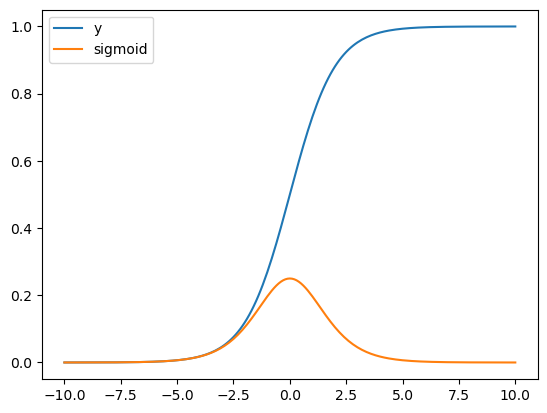

In [31]:
"""  
Thus, if you ask for the gradient of multiple targets, the result for each source is :
- The gradient of the sum of the targets, or equivalently,
- The sum of the gradients of each target. 
"""

x  = tf.Variable(2.0)
with tf.GradientTape() as tape:
    y0 = x**2
    y1 = 1 / x
    y = y0 + y1

print(tape.gradient({'y0': y0, 'y1': y1}, x).numpy())  # dy/dx = dy0/dx + dy1/dx = 2*x - 1/x^2 = 4 - 1/4 = 15/4
# print(tape.gradient(y, x).numpy())  # dy/dx = dy0/dx + dy1/dx = 2*x - 1/x^2 = 4 - 1/4 = 15/4


## Similarly, if the target(s) are not scalar, the gradient of the sum is calculated:
x = tf.Variable(2.0)
with tf.GradientTape() as tape:
    y = x * [1.0, 2.0, 3.0]  # y is a vector now

print(tape.gradient(y, x).numpy())  # dy/dx = [1.0, 2.0, 3.0], sum = 6.0

"""
This makes it simple to take the gradient of the sum of a collection of losses, or the gradient of the sum of element-wise loss calculations.  
if you need a seperate gradient for each item, refer to Jacobians. 
In some cases, you can skip the Jacobian. For an element-wise calculation, the gradient of the sum gives the derivative of each element with respect to its input-element, since each element is independent.

"""

x  = tf.linspace(-10, 10, 200+1)  
with tf.GradientTape() as tape:
    tape.watch(x)
    y = tf.nn.sigmoid(x)

dy_dx = tape.gradient(y, x)

plt.plot(x, y, label='y')
plt.plot(x, dy_dx, label="sigmoid")
plt.legend()
plt.show()

### Control flow

Because a gradient tape records operations as they are executed, python control flow is natually handled (for example, if and while statements).

Here a different variable is used on each branch of an if. The gradient only connects to the variable that was used. 



In [32]:
x = tf.constant(1.0)

v0 = tf.Variable(2.0)
v1 = tf.Variable(2.0)

with tf.GradientTape() as tape:
    tape.watch(x)
    if x > 0:
        result =  v0
    else:
        result = v1**2
        
dv0, dv1 = tape.gradient(result, [v0, v1])
print(f"Gradient wrt v0: {dv0.numpy()}")  # Should be 1.0
print(f"Gradient wrt v1: {dv1}")  # 

Gradient wrt v0: 1.0
Gradient wrt v1: None


----

### TensorFlow Module 

Base neural network module class.

A module is a named container for tf.Variables, other tf.Modules and functions which apply to user input. For example a dense layer in a neural network might be implemented as a tf.Module:



In [ ]:
class Dense(tf.Module):
    def __init__(self, input_size, output_size, name=None):
        super().__init__(name=name)
        # 初始化权重和偏置
        self.w = tf.Variable(tf.random.normal((output_size, input_size)), name='w')
        self.b = tf.Variable(tf.zeros((output_size,)), name='b')
    '''
    `__call__` 是Python中的一个**特殊方法**（magic method），它使得一个对象可以像函数一样被调用。

    ### 基本原理：
    - 当你定义了 `__call__` 方法后，对象实例就变成了**可调用对象**（callable）
    - 你可以直接使用 `对象名()` 的语法来调用对象，就像调用函数一样
    - 实际上会自动执行对象的 `__call__` 方法 
    '''
    def __call__(self, x):
        # 前向传播
        y = tf.matmul(self.w, tf.transpose(x)) + self.b[:, tf.newaxis]
        return tf.nn.relu(y)  # 使用ReLU激活函数
    
    
## you can use the Dense layer as you would expect:
d = Dense(input_size=3, output_size=2)  # 输入大小3，输出大小2
d(tf.ones([1,3]))

## By subclassing tf.Module instead of object any tf.Variables or tf.Module instances assigned to object properties can be collected using the variables, trainable_variables or submodules methods. This makes it easy to build complex models out of simple, reusable pieces.

d.variables



(<tf.Variable 'b:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>,
 <tf.Variable 'w:0' shape=(2, 3) dtype=float32, numpy=
 array([[-0.3479347 , -0.63158643, -1.2771387 ],
        [ 0.0831783 , -0.16191687, -0.04580844]], dtype=float32)>)

In [53]:

## Subclasses of tf.Module can take advantage of the _flatten method which can be used to implement tracking of any other types. 
## All tf.Module classes have an associated tf.name_scope which can be used to group operations in TensorBoard and create hierarchical names which can help with debugging. we suggest using the name scope when creating nested submodules/parameters or for forward methods whose graph you might want to inspect in TensorBoard. you can enter the name scope explicitly using a with self.name_scope(): block.or you can annotate methods (apart from __init__) with @tf.Module.with_name_scope to have them automatically enter the name scope when called.


class MLP(tf.Module):
    def __init__(self, input_size, sizes, name=None):
        super().__init__(name=name)
        self.layers = []
        for i, size in enumerate(sizes):
            layer = Dense(input_size=input_size, output_size=size, name=f'dense_{i}')
            self.layers.append(layer)
            input_size = size
            
    @tf.Module.with_name_scope
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
module = MLP(input_size=3, sizes=[5, 2])
module.variables

(<tf.Variable 'b:0' shape=(5,) dtype=float32, numpy=array([0., 0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'w:0' shape=(5, 3) dtype=float32, numpy=
 array([[-1.0387961e+00,  6.2589651e-01, -1.3271900e+00],
        [ 3.8544044e-01,  3.4829724e-01,  5.6471926e-01],
        [-5.8467859e-01,  2.9635718e-01,  5.9866445e-04],
        [ 1.2745401e-01, -1.3853037e+00, -1.2565813e+00],
        [-7.9661018e-01,  2.3742171e-02,  2.8781995e-01]], dtype=float32)>,
 <tf.Variable 'b:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>,
 <tf.Variable 'w:0' shape=(2, 5) dtype=float32, numpy=
 array([[-0.75878435, -0.33371702,  0.7965835 ,  1.2078881 , -1.0022925 ],
        [ 1.9517893 , -1.3006377 ,  0.49805993,  0.6341641 ,  0.9978493 ]],
       dtype=float32)>)

## TensorFlow modules, layers, and models
tf.Module is a class for managing your tf.Variables objects, and the tf.function objects that operate on them. 
The tf.Module class is necessary to support two significant features:

1. You can save and restore the values of your variables using tf.train.Checkpoint. This is useful during training as it is quick to save and restore a model's state.
2. You can import and export the tf.Variables value and the tf.function graphs using tf.saved_model. this is allows you to run your model independently of python pragram that created it.



### TensorFlow Training loops

Now put this all together to build a basic model and train it from scratch.

First, create some example data. This generates a cloud of points that loosely follows a quadrtic curve. 

